<a href="https://colab.research.google.com/github/lindachojnacka/QM2/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging and Joining

## *Workshop 6*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/W06.%20Merging%20and%20Joining.ipynb)


Sometimes, we will want to combine data from different sources about the same subject - perhaps we want to compare the GDP in a country with life expectancy, or the proportion of free schools meals with the level of unemployment.

### Aims
- Understand joins
- Work with joining dataframes in Pandas
- Create your own examples

## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command.

Don't worry if it generates an error, that means you've already got a data folder.


In [1]:
!mkdir data

In [2]:
!mkdir data/wk5
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Life_all.csv -o ./data/wk5/UN_Life_all.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Cities_1214_country.csv -o ./data/wk5/UN_Cities_1214_country.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Cities_1214_population.csv -o ./data/wk5/UN_Cities_1214_population.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  354k  100  354k    0     0   241k      0  0:00:01  0:00:01 --:--:--  241k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31445  100 31445    0     0  39799      0 --:--:-- --:--:-- --:--:-- 39803
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  373k  100  373k    0     0   306k      0  0:00:01  0:00:01 --:--:--  306k


## Joining Instructions

Joins are the combination of different datasets, and are common in relational databases as a way of performing queries. There are lots of examples of why and when we might want to do this, but most start with two tables of data. We're going to start with some data we've generated.

I'm going to go back and work with fake data for a while, because it's clean and small and we can see what's going on - when we work with real data, we have to take great care that the data is clean, the indices match, and so on.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
%matplotlib inline


Let's create dataframes which represent fictitious values associated with people. Let's assume our data is anonymised because we're ethical researchers and don't want information about real people leaking out.

In [4]:
people1 = pd.DataFrame(5+np.random.randn(5, 5))
people1.columns = ['units of alcohol drunk','cigarettes smoked','sleep per night','height','BMI']

In [5]:
people1

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.427058,6.451994,5.183706,4.360108,5.219395
1,4.747071,4.936771,5.246438,4.244465,4.977293
2,3.598980,6.323982,4.153170,4.141476,5.800223
3,5.667924,5.613577,4.731169,4.708205,4.953544
4,4.327581,4.366437,7.465976,4.914500,4.522014


In [6]:
people2 = pd.DataFrame(5+np.random.randn(3, 5))
people2.columns = ['units of alcohol drunk','cigarettes smoked','sleep per night','height','BMI']

In [7]:
people2

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,6.574978,6.532304,4.525423,4.899634,7.738383
1,5.195401,4.812196,6.438084,4.366200,4.386865
2,3.408036,7.080829,5.522525,3.284094,5.957118


# Adding new observations

It looks as if we have some data about people (although we've just made it up), and a set of common measurements. It would be nice to have all of this in one place, so let's *merge* them into one dataframe. We'll use the *concat* command, which is short for *concatenate*, or "chain together".

In [8]:
people3 = pd.concat([people1,people2])

In [9]:
people3

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.427058,6.451994,5.183706,4.360108,5.219395
1,4.747071,4.936771,5.246438,4.244465,4.977293
2,3.598980,6.323982,4.153170,4.141476,5.800223
3,5.667924,5.613577,4.731169,4.708205,4.953544
4,4.327581,4.366437,7.465976,4.914500,4.522014
0,6.574978,6.532304,4.525423,4.899634,7.738383
1,5.195401,4.812196,6.438084,4.366200,4.386865
2,3.408036,7.080829,5.522525,3.284094,5.957118


### What is the problem above?

In [10]:
people4 = pd.concat([people1,people2], ignore_index=True)

In [11]:
people4

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.427058,6.451994,5.183706,4.360108,5.219395
1,4.747071,4.936771,5.246438,4.244465,4.977293
2,3.598980,6.323982,4.153170,4.141476,5.800223
3,5.667924,5.613577,4.731169,4.708205,4.953544
4,4.327581,4.366437,7.465976,4.914500,4.522014
5,6.574978,6.532304,4.525423,4.899634,7.738383
6,5.195401,4.812196,6.438084,4.366200,4.386865
7,3.408036,7.080829,5.522525,3.284094,5.957118


`ignore_index` is very useful when we want a new DataFrame which only contains data from other DataFrames, but unrelated otherwise.

## Data with a unique index: adding new observations

Let's now examine data where the elements of study are not anonymous. Let's consider that we have some city data. If we have city names (or equivalent) in the index column, simply concatenating them would be fine, because the names would not repeat in the way the index has above.

In [12]:
df1 = pd.DataFrame(5+np.random.randn(5, 5))
df1.columns = ['area','population','mean temperature','elevation','annual rainfall']
df1.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [13]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,5.569650,5.958941,3.651995,4.564893,4.335636
Paris,5.063335,5.973118,4.161238,4.942124,3.764671
Beijing,5.760372,5.339479,5.044780,7.581844,4.593105
Medellin,5.967660,5.035821,4.661731,5.439890,3.953923
Port Elizabeth,5.299595,4.974887,4.580562,4.352393,4.320833


In [14]:
df2 = pd.DataFrame(5+np.random.randn(3, 5))
df2.columns = ['area','population','mean temperature','elevation','annual rainfall']
df2.index = ['Mumbai', 'Sydney', 'Boston']

In [15]:
df2

,area,population,mean temperature,elevation,annual rainfall
Mumbai,4.259680,4.041057,3.852464,5.700650,5.374857
Sydney,4.234998,4.166280,4.726463,4.107265,3.762799
Boston,4.064332,7.062688,4.269739,5.892026,3.794202


In [16]:
df3 = pd.concat([df1,df2])

In [17]:
df3

,area,population,mean temperature,elevation,annual rainfall
London,5.569650,5.958941,3.651995,4.564893,4.335636
Paris,5.063335,5.973118,4.161238,4.942124,3.764671
Beijing,5.760372,5.339479,5.044780,7.581844,4.593105
Medellin,5.967660,5.035821,4.661731,5.439890,3.953923
Port Elizabeth,5.299595,4.974887,4.580562,4.352393,4.320833
Mumbai,4.259680,4.041057,3.852464,5.700650,5.374857
Sydney,4.234998,4.166280,4.726463,4.107265,3.762799
Boston,4.064332,7.062688,4.269739,5.892026,3.794202


## Exercise: Concat continued

Repeat the above for fictitious values for New York, Tokyo, Manila and Budapest - concatenate into a new dataframe "df".

In [18]:
df4 = pd.DataFrame(5+np.random.randn(4, 5))
df4.columns = ['area','population','mean temperature','elevation','annual rainfall']
df4.index = ['New York', 'Tokyo', 'Manila', 'Budapest']

In [19]:
df4

,area,population,mean temperature,elevation,annual rainfall
New York,4.916768,4.551840,4.980091,7.118230,3.699194
Tokyo,4.947110,2.200216,3.761074,3.787252,5.747475
Manila,5.182085,4.416316,4.641356,6.219259,5.559173
Budapest,5.204052,6.510342,3.959076,4.929586,5.190850


In [20]:
df = pd.concat([df1,df2,df4])
df

,area,population,mean temperature,elevation,annual rainfall
London,5.569650,5.958941,3.651995,4.564893,4.335636
Paris,5.063335,5.973118,4.161238,4.942124,3.764671
Beijing,5.760372,5.339479,5.044780,7.581844,4.593105
Medellin,5.967660,5.035821,4.661731,5.439890,3.953923
Port Elizabeth,5.299595,4.974887,4.580562,4.352393,4.320833
Mumbai,4.259680,4.041057,3.852464,5.700650,5.374857
Sydney,4.234998,4.166280,4.726463,4.107265,3.762799
Boston,4.064332,7.062688,4.269739,5.892026,3.794202
New York,4.916768,4.551840,4.980091,7.118230,3.699194
Tokyo,4.947110,2.200216,3.761074,3.787252,5.747475


## Combining on Attributes

What if we're looking at the same locations but different attributes? Consider the same df1

In [21]:
df1 = pd.DataFrame(5+np.random.randn(5, 5))
df1.columns = ['area','population','mean temperature','elevation','annual rainfall']
df1.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [22]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,4.775623,5.112320,4.260191,4.093689,6.259019
Paris,7.383437,5.632267,5.452789,3.960673,6.284481
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185


But a new dataframe df4, which details the same locations, but has different information about them:

In [23]:
df4 = pd.DataFrame(5+np.random.randn(5, 3))
df4.columns = ['Mean House Price', 'median income','walkability score']
df4.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [24]:
df4

,Mean House Price,median income,walkability score
London,5.451676,6.145026,4.642364
Paris,5.433714,3.785896,6.377355
Beijing,4.263757,4.736327,5.762989
Medellin,4.507968,6.168022,5.822765
Port Elizabeth,5.572836,4.942355,7.215589


We have to join "on" the index - meaning when merging the records, python will look at the index column.

In [25]:
df_joined = df1.merge(df4, left_index=True, right_index=True)

In [26]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,5.451676,6.145026,4.642364
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,5.433714,3.785896,6.377355
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429,4.263757,4.736327,5.762989
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216,4.507968,6.168022,5.822765
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185,5.572836,4.942355,7.215589


Note that this joins on the *index*, not the row number - so if the order of elements in df4 is different, it should still work.

In [27]:
df4 = pd.DataFrame(np.random.randn(5, 3))
df4.columns = ['Mean House Price', 'median income','walkability score']
df4.index = ['Paris','Port Elizabeth', 'Beijing', 'Medellin', 'London']

In [28]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,4.775623,5.112320,4.260191,4.093689,6.259019
Paris,7.383437,5.632267,5.452789,3.960673,6.284481
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185


In [29]:
df4

,Mean House Price,median income,walkability score
Paris,1.190443,1.700826,0.490380
Port Elizabeth,0.108911,0.455457,-0.531125
Beijing,0.821302,0.734589,1.120180
Medellin,-0.105339,0.414638,-0.340863
London,1.007671,-0.347224,0.652883


In [30]:
df_joined = df1.merge(df4, left_index=True, right_index=True)

In [31]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,1.007671,-0.347224,0.652883
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,1.190443,1.700826,0.490380
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429,0.821302,0.734589,1.120180
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216,-0.105339,0.414638,-0.340863
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185,0.108911,0.455457,-0.531125


## Merge Records
Consider now a case where we have data for some but not all cities; so df1 stil has data for these 5 cities:

In [32]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,4.775623,5.112320,4.260191,4.093689,6.259019
Paris,7.383437,5.632267,5.452789,3.960673,6.284481
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185


But our new table, df5, contains data for three cities:

In [33]:
df5 = pd.DataFrame(5+np.random.randn(3, 3))
df5.columns = ['Mean House Price', 'median income','walkability score']
df5.index = ['London', 'Paris', 'Glasgow']

In [34]:
df5

,Mean House Price,median income,walkability score
London,4.288297,5.569181,6.667719
Paris,4.403554,6.802591,4.646176
Glasgow,5.347245,4.777020,5.946506


In [35]:
df6 = pd.concat([df1,df5])
df6

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,NaN,NaN,NaN
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,NaN,NaN,NaN
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429,NaN,NaN,NaN
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216,NaN,NaN,NaN
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185,NaN,NaN,NaN
London,NaN,NaN,NaN,NaN,NaN,4.288297,5.569181,6.667719
Paris,NaN,NaN,NaN,NaN,NaN,4.403554,6.802591,4.646176
Glasgow,NaN,NaN,NaN,NaN,NaN,5.347245,4.777020,5.946506


## Exercise:

How many cities appear in:
- both dataframes
- only df1
- only df5
- neither df1 nor df5?

There are 5 cities id df1.
There are 3 cities in df5.
There are 8 cities in both dataframes/

## Way Back Venn

What is the mechanism for joining data where these mismatches exist? Well, there are several, starting with the...

## Inner Join:

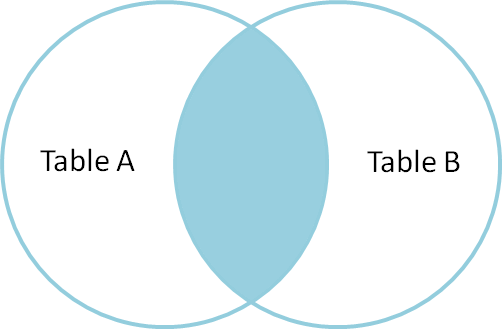

In [36]:
from IPython.display import Image

data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk3/inner.png"
Image(data_path)

(Image from http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/)

The inner join *only* includes data whose index appears in both tables. Let's see what that looks like:

In [37]:
df_joined = df1.merge(df5, left_index=True, right_index=True)

In [38]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,4.288297,5.569181,6.667719
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,4.403554,6.802591,4.646176


Here, we have a couple of arguments specifying the manner of the join - we have specified that we are joining on the index of the left and right dataset with the optional "left_index=True" and "right_index=True". Less obviously, the **left** dataset is df1 (because we're using *df1.merge()* and the **right** dataset is df5 (because it appears as an argument in merge(). There's no special reason it shouldn't be the other way around, but for this function, it is this way around and we need to remember that when we use it.

## Inner Space

Although we haven't specified it, the merge() function has defaulted to an inner join (like the diagram above). We can specify how the join is calculated by changing the text in the optional argument "how":

In [39]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='inner')

In [40]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,4.288297,5.569181,6.667719
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,4.403554,6.802591,4.646176


## The Future of The Left
The *left* join includes **all** rows where the index appears on the **left** hand side of the join, and **any** data which **matches** it on the **right** hand side. If the index appears on the left but not the right, it will include the data from the left table, and have blanks for the columns on the right.

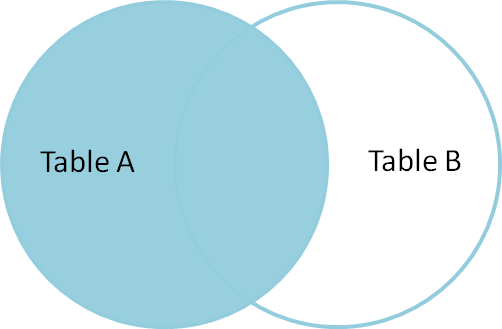

In [41]:
data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk3/left.png"
Image(data_path)

What does *this* look like? We will use the *how='left'* optional argument to create a left join:

In [42]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='left')

In [43]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,4.288297,5.569181,6.667719
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,4.403554,6.802591,4.646176
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429,NaN,NaN,NaN
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216,NaN,NaN,NaN
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185,NaN,NaN,NaN


As we see, the missing data appears as **NaN** - Not a Number.

## Exercise:

Carry out *right* and *outer* joins on the dataframes df1 and df5 and explain how they're filtering and joining the data.

In [44]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='right')
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.775623,5.112320,4.260191,4.093689,6.259019,4.288297,5.569181,6.667719
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,4.403554,6.802591,4.646176
Glasgow,NaN,NaN,NaN,NaN,NaN,5.347245,4.777020,5.946506


In [45]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='outer')
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
Beijing,2.874611,4.392430,4.084003,4.058843,5.061429,NaN,NaN,NaN
Glasgow,NaN,NaN,NaN,NaN,NaN,5.347245,4.777020,5.946506
London,4.775623,5.112320,4.260191,4.093689,6.259019,4.288297,5.569181,6.667719
Medellin,6.308887,5.233474,5.243054,3.877452,5.397216,NaN,NaN,NaN
Paris,7.383437,5.632267,5.452789,3.960673,6.284481,4.403554,6.802591,4.646176
Port Elizabeth,6.038000,5.340177,6.615279,4.696510,5.328185,NaN,NaN,NaN


The outer join Returns all the rows when there is a match in either the left or the right dataframe. Non-matching rows from both dataframes will have NaN values for the columns from the dataframe where there is no match.

The right join returns all the rows from the right dataframe and the matching rows from the left dataframe.

## I Am The One and Only

So far, we've carried out joins on data which have a *one-to-one* relationship; data for cities or people. What if our data has a *one-to-many* correspondence?

*Example:* We want to look at the quality of life in cities (a real student project from 2014). We have a dataset listing city-level characteristics for a number of cities in Europe, including the country each city is in. We also have a dataset listing the GDP, life expectancy and other indicators for a number of *countries* in Europe. How do we create a dataframe which, for each city, lists all of the characteristics of a city and those of its parent country?

We'll be working now with data from the UN, covering information about cities - real data this time. The UN has some great data, we've taken some from here and processed it in various ways:

http://data.un.org/Data.aspx?d=POP&f=tableCode%3A240

Let's load up data on city population - this set contains data for 2012-2014 inclusive:

In [46]:
data_path = "./data/wk5/UN_Cities_1214_population.csv"

city_pop = pd.read_csv(data_path, encoding='latin1')

In [47]:
city_pop.head()

,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes
0,2013,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,11370.0,NaN
1,2013,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5445.0,NaN
2,2013,Total,Female,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5925.0,NaN
3,2012,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,11304.5,NaN
4,2012,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,5408.0,NaN


## Exercise

There is a another datafile we downloaded called *UN_Cities_1214_country.csv*. This is saved to *./data/wk5/UN_Cities_1214_country.csv* - Load this into a dataframe called *city_c* with the city name as the index and view it; then, using *merge* on city name with city_pop to create a new dataframe called *cities*.

**Hints:**
You'll notice that the index **won't** be the column you want to merge on in the city_pop data. What column *should* you merge on in city_pop? Which column should you merge on in city_c?

The syntax for merging on a **column** (which is not the index) is to pass the column name to the optional 'left_on=' or 'right_on=' arguments. And we don't use right_index=True (or left_index=True), depending on which we're using.

So for example: **df1.merge(df2, left_on='Name', right_index=True)** would join df1 (on the left) to df2 (on the right), using the column 'Name' on the left (df1) and the index column (whatever that is) on the right (df2).

In [77]:
# import pandas as pd

# # Load the UN_Cities_1214_country.csv file into a dataframe called city_c

# #city_c = "./data/wk5/UN_Cities_1214_country.csv"

# city_c = "./data/wk5/UN_Cities_1214_country.csv"
# city_c = pd.read_csv(city_c, index_col='City', encoding='latin1')

# #city_pop = pd.read_csv(data_path, encoding='latin1')


# # # Display the city_c dataframe
# # print("city_c dataframe:")
# #print(city_c.head())

# # # Assuming you already have the city_pop dataframe

# # # Merge city_c with city_pop on the 'city_name' column
# # cities = pd.merge(city_pop, city_c, left_on='city_name', right_index=True)

# # # Display the merged dataframe
# # print("\nMerged dataframe 'cities':")
# # print(cities.head())


In [78]:
import pandas as pd

city_c = "./data/wk5/UN_Cities_1214_country.csv"
city_c = pd.read_csv(city_c, index_col='City', encoding='latin1')

# Display  city_c
print("City_C DataFrame:")
print(city_c.head())

# Merge city_c with city_pop on the 'City' column
cities = city_pop.merge(city_c, left_on='City', right_index=True)

# Display the merged Dataframe
print("\nMerged Cities DataFrame:")
print(cities.head())


City_C DataFrame:
                              Country or Area
City                                         
MARIEHAMN                      íland Islands
Bahí_a Blanca-Cerri                 Argentina
BUENOS AIRES                        Argentina
Catamarca                           Argentina
Comodoro Rivadavia-Rada Tilly       Argentina

Merged Cities DataFrame:
   Year   Area         Sex       City    City type         Record Type  \
0  2013  Total  Both Sexes  MARIEHAMN  City proper  Estimate - de jure   
1  2013  Total        Male  MARIEHAMN  City proper  Estimate - de jure   
2  2013  Total      Female  MARIEHAMN  City proper  Estimate - de jure   
3  2012  Total  Both Sexes  MARIEHAMN  City proper  Estimate - de jure   
4  2012  Total        Male  MARIEHAMN  City proper  Estimate - de jure   

              Reliability  Source Year    Value Value Footnotes  \
0  Final figure, complete         2014  11370.0             NaN   
1  Final figure, complete         2014   5445.0        

## A footnote about footnotes

Just a quick note - if you look at the primary UN data, you'll see footnotes which will confuse the hell out of Pandas. I've taken the footnotes out, but you can use .tail() to see whether there's any junk in the trunk, and remove it via a text editor.

## Clean data
We need to simplify this data a bit in the following ways:

1. I'm going to focus on one year (2012)
2. I'm going to just look at "Both Sexes" (not focus on one gender)
3. I'm going to get rid of a column of data (the 'Value Footnotes' column) using the *drop()* method.

In [79]:
cities = cities[cities['Sex']=='Both Sexes']
cities = cities[cities['Year']==2012]
cities.drop('Value Footnotes', axis=1, inplace=True)

In [80]:
cities.head()

,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Country or Area
3,2012,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,11304.5,íland Islands
34,2012,Total,Both Sexes,BUENOS AIRES,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,13242375.0,Argentina
35,2012,Total,Both Sexes,Catamarca,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,212174.0,Argentina
36,2012,Total,Both Sexes,Comodoro Rivadavia-Rada Tilly,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,145475.0,Argentina
37,2012,Total,Both Sexes,Concordia,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,155905.0,Argentina


## Extension: In My Place

The command I used to get rid of that column is *cities.drop('Value Footnotes', axis=1, inplace=True)*. The syntax is not so complex - the first argument, *'Value Footnotes'*, is just the name of the column; the second argument,  *axis=1*, tells Pandas to look for a column to remove (instead of a row which has *axis=0*); the third and final argument, *inplace=True*, is a command that tells Pandas to edit *inplace*, i.e. to edit the dataframe (*cities*) directly. When *inplace* is False (the default), this command does not directly edit cities, but instead provide an output. So the syntax for that would be

new_cities = cities.drop('Value Footnotes', axis=1)

and new_cities would be a version of *cities* without the offending column. This is usually the safer option.

## Life, Oh Life

The UN also has useful data by country, so let's try and work with some of that and join it up with our city data. Let's work with Life Expectancy Data:

http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3ASP.DYN.LE00.IN

In [50]:
data_path = "./data/wk5/UN_Life_all.csv"
life = pd.read_csv(data_path, index_col=0)

In [51]:
life.head()

,Year,Value,Value Footnotes
Country or Area,,,
Afghanistan,2012,60.509122,NaN
Afghanistan,2011,60.065366,NaN
Afghanistan,2010,59.600098,NaN
Afghanistan,2009,59.112341,NaN
Afghanistan,2008,58.607098,NaN


## Exercise:

In a new cell, clean up the above dataframe by

- removing the "Value Footnotes" Column
- use only the most recent data (2012)

In [52]:
# Removing the "Value Footnotes" column
life = life.drop(columns=['Value Footnotes'])

# keeping only the most recent data (2012)
life = life[life['Year'] == 2012]

# Display the cleaned dataframe
print("Cleaned 'life' dataframe:")
print(life.head())



Cleaned 'life' dataframe:
                     Year      Value
Country or Area                     
Afghanistan          2012  60.509122
Albania              2012  77.350463
Algeria              2012  70.882171
Angola               2012  51.464000
Antigua and Barbuda  2012  75.665317


Let's make it a little clearer what "Value" refers to, by renaming the column. This is one way to do that:

In [53]:
life.rename(columns={'Value':'Life Expectancy'}, inplace=True)

In [54]:
life.head()

,Year,Life Expectancy
Country or Area,,
Afghanistan,2012,60.509122
Albania,2012,77.350463
Algeria,2012,70.882171
Angola,2012,51.464000
Antigua and Barbuda,2012,75.665317


# Exercise

Now, merge this data with the cities data to show life expectancy for each city (based on the country it is in), and show the first 5 rows.

How much data was "missing" in the merge?

Relabel the City Population column so it's clear what it represents.


**Extension:** Plot population against life expectancy. Use plot's *optional arguments* to specify the x column, y column, and that kind='scatter'.

**Don't forget to include a title and axis labels!**

Merged DataFrame:
              Country or Area  Year_x Area  Sex City City type Record Type  \
A Coruí±a               Spain     NaN  NaN  NaN  NaN       NaN         NaN   
ADAMSTOWN            Pitcairn     NaN  NaN  NaN  NaN       NaN         NaN   
ANKARA                 Turkey     NaN  NaN  NaN  NaN       NaN         NaN   
Aachen                Germany     NaN  NaN  NaN  NaN       NaN         NaN   
Abakan     Russian Federation     NaN  NaN  NaN  NaN       NaN         NaN   

          Reliability  Source Year  Value_x Value Footnotes_x  Year_y  \
A Coruí±a         NaN          NaN      NaN               NaN  2012.0   
ADAMSTOWN         NaN          NaN      NaN               NaN     NaN   
ANKARA            NaN          NaN      NaN               NaN  2012.0   
Aachen            NaN          NaN      NaN               NaN  2012.0   
Abakan            NaN          NaN      NaN               NaN  2012.0   

             Value_y  Value Footnotes_y  
A Coruí±a  82.378049            

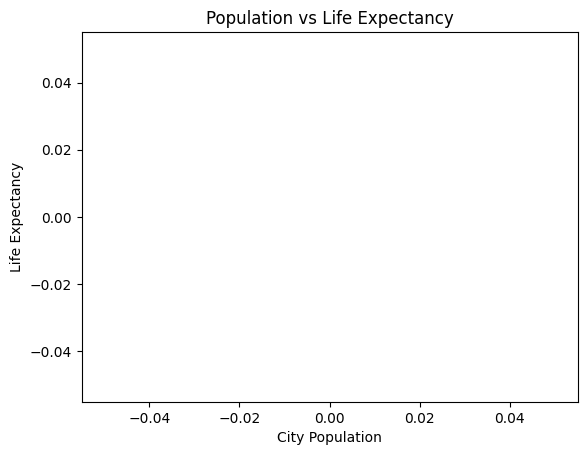

In [99]:
cities = city_c.merge(city_pop, how='left', left_index=True, right_index=True)

# cleaning
life = pd.read_csv('./data/wk5/UN_Life_all.csv', index_col=0)
life = life[life['Year'] == 2012]

# Mergeing cities and life
merged_df = cities.merge(life, how='left', left_on='Country or Area', right_index=True)

# first 5 rows of the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

# # Check how much data is missing
# missing_data = merged_df.isnull().sum()
# print("\nMissing Data:")
# print(missing_data)


# Plot
plt.scatter(merged_df['Value_y'], merged_df['Value_x'])
plt.title('Population vs Life Expectancy')
plt.xlabel('City Population')
plt.ylabel('Life Expectancy')
plt.show()

## Recap: Joins

Pandas has **four** join methods:

    - Left Join: use **only** keys from **left** DataFrame. SQL: [left outer join](http://goo.gl/JICveI)
    - Right Join: use **only** keys from **right** DataFrame. SQL: [right outer join](http://goo.gl/TrrHjQ)
    - Outer Join: use union of **keys from both** DataFrames. SQL: [full outer join](http://goo.gl/bVRqO8)
    - Inner Join: use **intersection of keys** from both DataFrames. SQL: [inner join](http://goo.gl/Cf1MF8)